In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sb
%matplotlib inline

In [18]:
#c) Seleção e tratamento de variáveis;
'''
1-cura
2-obito
3-obito outras causas
9-ignorado
remover casos de item 3 e 9

tranformar cada instancia de cada coluna em labels 

talvez remover coluna grupo de risco 
''' 
dados = pd.read_csv('https://raw.githubusercontent.com/ChernoBen/IAatividadeII/main/new_dataset', sep= ';')
'''removendo valores diferentes de obitos e cura'''
#Remoção de variáveis relacionadas ao óbito (data do óbito e número da declaração de óbito)
dados  = dados.drop(dados[dados['EVOLUCAO'] > 2 ].index)
dados  = dados.drop(dados[dados['EVOLUCAO'] < 1  ].index)

In [19]:
from sklearn.model_selection import train_test_split
#Treino de classificador para classificar entre “óbito por COVID-19” e “cura” (informação da coluna “EVOLUCAO”);
gabarito = dados['EVOLUCAO']
X = np.array(dados.drop('EVOLUCAO',axis=1))
'''criando rotulos para coluna grupos de risco'''
def rotula(dataset):
    arr =[]
    dt = dataset
    for item in dataset:
        if item == 'S':
            arr.append(1)
        else:
            arr.append(0)
    return arr
X[:,14] = rotula(X[:,14])


In [20]:
'''Intanciando kmeans'''
kmeans = KMeans(n_clusters=2)
'''Treinando'''
kmeans.fit(X)
'''visualizar labels'''
kmeans.labels_
lb = kmeans.cluster_centers_
'''adicionando resultados a uma nova coluna na base original'''
dados['result'] = kmeans.labels_
'''gerando previsoes e comparando com gabarito'''
y_kmeans = kmeans.predict(X)
y_kmeans

#Avaliar classificador e reportar a acurácia geral e por classe em conjunto de teste.
gb = np.array(gabarito)
gb
y_kmeans
contador = 0
for i in range(len(gb)):
    if gb[i] == y_kmeans[1]:
        contador +=1
        
contador


0

In [22]:
#sb.pairplot(dados,'result')
sb.pairplot(dados,'result',hue='FATOR_RISC')



C:\Users\MasterTecnologia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


MemoryError: Unable to allocate 22.8 MiB for an array with shape (746170, 4) and data type float64

MemoryError: In RendererAgg: Out of memory

<Figure size 4140x4140 with 552 Axes>

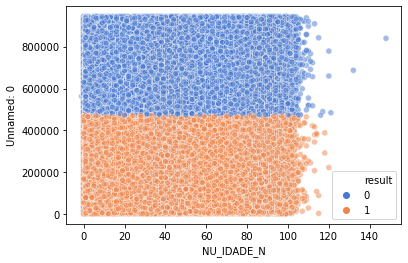